**Acceso Google Drive**

In [1]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd '/content/gdrive/MyDrive'

/content/gdrive/MyDrive


**Estructurando un proyecto de DS**



**Abstract**

El objetivo de este estudio es analizar la correlación entre la variación del precio de Bitcoin y el índice S&P 500. Para ello, se recopilaron datos diarios del precio de Bitcoin y los valores del índice S&P 500 durante el período 2012-2017. Utilizando técnicas estadísticas, se calculara la correlación entre las variaciones diarias de ambos activos. La correlación puede variar en una escala de -1 a 1, donde -1 indica una correlación negativa perfecta, 1 indica una correlación positiva perfecta y 0 indica una falta de correlación.

Hipótesis:
• Existe correlación entre la variación de precios del Índice S&P y Bitcoin?
• Cuando el precio del Índice S&P tiene tendencia a la baja, esa tendencia se evidencia en el precio del Bitcoin?
• Cuando el precio del Bitcoin tiene tendencia el alza, esa tendencia se evidencia en el Índice S&P?

Se buscara establecer, utilizando técnicas estadísticas, la correlación o no entre las variaciones de precios de ambos activos. Una correlación positiva indicaría que los precios de Bitcoin y el S&P 500 tienden a moverse en la misma dirección, es decir, cuando el S&P 500 sube, el precio de Bitcoin también tiende a subir, y viceversa. Por otro lado, una correlación negativa indicaría que los precios se mueven en direcciones opuestas. Es importante tener en cuenta que la correlación no implica causalidad, es decir, no significa que los movimientos en el precio de Bitcoin causen cambios en el índice S&P 500 o viceversa. Puede haber otros factores o eventos macroeconómicos que influyan en ambos activos simultáneamente.

**Contexto Comercial.**

**Índice S&P**

El índice Standard & Poor´s 500, o más conocido como S&P 500, recoge 500 empresas estadounidenses seleccionadas por su tamaño, liquidez y representatividad por actividad económica, incluyendo 400 industriales, 20 del sector transporte, 40 de servicios y 40 financieras. El S&P 500 fue creado en el año 1923, cuando la empresa Standard & Poor´s introdujo un índice cubriendo 233 compañías. Sin embargo, el selectivo, tal y como se conoce hoy en día, fue creado en 1957 cuando se expandió incluyendo las 500 compañías más grandes del mundo. La elección de las compañías que tributan dentro del mismo se realiza por capitalización y es lo suficientemente representativo, pero no contempla empresas pequeñas y medianas. El S&P 500 se calcula mediante una media aritmética ponderada por capitalización y representa la mayor parte de la capitalización bursátil de los Estados.

**Bitcoin**

El Bitcoin es una moneda digital o criptomoneda que puede utilizarse para intercambiar bienes y servicios como cualquier otra moneda. Es una moneda eletrónica libre y descentralizada que permite la transacción directa sin ningún intermediario. A diferencia de cualquier otra divisa, el Bitcoin no es dinero fiduciario. Es decir, no está respaldado por la confianza de un banco central, por un gobierno o por un material (por ejemplo patrón oro). En cambio, sí que utilizan un sistema de prueba de trabajo para evitar el doble gasto y se alcance un consenso entre todos los nodos que operan en la red. Este consenso se conoce como blockchain (cadena de bloques).

**Problema comercial.** La pregunta que se tratara de responder es: existe correlación entre la variación de precios del Índice S&P y Bitcoin?

**Contexto Analítico**.contamos con datasets con las variaciones de precios (mínimos,máximos,cierre y apertura) tanto del Índice S&P como de Bitcoin en el periodo 2012-2017.

El caso se estructura de la siguiente manera, vamos a:

1. Realizar análisis de datos exploratorios para investigar visualmente la estructura de los datos.
2. Diseño de gráficos de dispersión de las distintas variables de precios para analizar la variación de ambos activos.
3. Extraer conclusiones sobre la correlación o no en el movimiento de precios de ambos activos.

**Importación de librerías**

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [7]:
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

In [8]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=11,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

**Carga Datasets**

In [9]:
bitcoin=pd.read_csv("Datos históricos BTC_USD Bitfinex.csv", encoding="latin",sep=";")
bitcoin

,Date,Close,Apertura,Máximo,Mínimo,Volume,% var.
0,15.11.2017,"7.278,30","6.589,90","7.310,20","6.589,90","71,61K","10,63%"
1,14.11.2017,"6.579,20","6.476,50","6.687,80","6.315,40","49,52K","1,62%"
2,13.11.2017,"6.474,60","5.806,50","6.680,00","5.786,10","110,44K","11,21%"
3,12.11.2017,"5.822,10","6.282,40","6.465,00","5.426,00","172,69K","-7,60%"
4,11.11.2017,"6.300,70","6.541,20","6.788,00","6.166,00","72,84K","-3,69%"
...,...,...,...,...,...,...,...
2105,06.02.2012,"5,4","5,4","5,4","5,4",NaN,"-4,22%"
2106,05.02.2012,"5,7","5,7","5,7","5,7",NaN,"-3,07%"
2107,04.02.2012,"5,9","5,9","5,9","5,9",NaN,"-1,51%"
2108,03.02.2012,6,6,6,6,NaN,"-2,30%"


In [10]:
bitcoin=pd.read_csv("Datos históricos BTC_USD Bitfinex.csv", encoding="latin",sep=";")
bitcoin

,Date,Close,Apertura,Máximo,Mínimo,Volume,% var.
0,15.11.2017,"7.278,30","6.589,90","7.310,20","6.589,90","71,61K","10,63%"
1,14.11.2017,"6.579,20","6.476,50","6.687,80","6.315,40","49,52K","1,62%"
2,13.11.2017,"6.474,60","5.806,50","6.680,00","5.786,10","110,44K","11,21%"
3,12.11.2017,"5.822,10","6.282,40","6.465,00","5.426,00","172,69K","-7,60%"
4,11.11.2017,"6.300,70","6.541,20","6.788,00","6.166,00","72,84K","-3,69%"
...,...,...,...,...,...,...,...
2105,06.02.2012,"5,4","5,4","5,4","5,4",NaN,"-4,22%"
2106,05.02.2012,"5,7","5,7","5,7","5,7",NaN,"-3,07%"
2107,04.02.2012,"5,9","5,9","5,9","5,9",NaN,"-1,51%"
2108,03.02.2012,6,6,6,6,NaN,"-2,30%"


In [12]:
pd.to_datetime("02-12-2012")

Timestamp('2012-02-12 00:00:00')

In [13]:
bitcoin['Year'] = pd.to_datetime(bitcoin['Date']).dt.year #Agregue la columna año para poder filtrar los gráficos

<ipython-input-13-223b1832efaf>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  bitcoin['Year'] = pd.to_datetime(bitcoin['Date']).dt.year #Agregue la columna año para poder filtrar los gráficos


In [14]:
bitcoin.rename(columns={'Date': 'Fecha'}, inplace=True)

In [15]:
bitcoin.rename(columns={'Close': 'Último'}, inplace=True)

In [16]:
bitcoin

,Fecha,Último,Apertura,Máximo,Mínimo,Volume,% var.,Year
0,15.11.2017,"7.278,30","6.589,90","7.310,20","6.589,90","71,61K","10,63%",2017
1,14.11.2017,"6.579,20","6.476,50","6.687,80","6.315,40","49,52K","1,62%",2017
2,13.11.2017,"6.474,60","5.806,50","6.680,00","5.786,10","110,44K","11,21%",2017
3,12.11.2017,"5.822,10","6.282,40","6.465,00","5.426,00","172,69K","-7,60%",2017
4,11.11.2017,"6.300,70","6.541,20","6.788,00","6.166,00","72,84K","-3,69%",2017
...,...,...,...,...,...,...,...,...
2105,06.02.2012,"5,4","5,4","5,4","5,4",NaN,"-4,22%",2012
2106,05.02.2012,"5,7","5,7","5,7","5,7",NaN,"-3,07%",2012
2107,04.02.2012,"5,9","5,9","5,9","5,9",NaN,"-1,51%",2012
2108,03.02.2012,6,6,6,6,NaN,"-2,30%",2012


In [17]:
for var in ['Último', 'Apertura', 'Máximo','Mínimo']:
 bitcoin[var]=bitcoin[var].str.replace(".","").str.replace(",",".").astype('float64')

<ipython-input-17-dfd79c1364e3>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  bitcoin[var]=bitcoin[var].str.replace(".","").str.replace(",",".").astype('float64')


In [18]:
bitcoin["Fecha"]=pd.to_datetime(bitcoin["Fecha"],dayfirst=True)

In [19]:
bitcoin.rename(columns={'Último': 'Ultimo'}, inplace=True)

In [20]:
pd.read_csv('Datos históricos S&P 500.csv', encoding="latin",sep=";")

,Fecha,Último,Apertura,Máximo,Mínimo,% var.
0,15.11.2017,"2.564,62","2.569,45","2.572,84","2.557,45","-0,55%"
1,14.11.2017,"2.578,87","2.577,75","2.579,66","2.566,56","-0,23%"
2,13.11.2017,"2.584,84","2.576,53","2.587,66","2.574,48","0,10%"
3,10.11.2017,"2.582,30","2.580,18","2.583,81","2.575,57","-0,09%"
4,09.11.2017,"2.584,62","2.584,00","2.586,50","2.566,33","-0,38%"
...,...,...,...,...,...,...
1453,08.02.2012,"1.349,96","1.347,04","1.351,00","1.341,95","0,22%"
1454,07.02.2012,"1.347,05","1.344,33","1.349,24","1.335,92","0,20%"
1455,06.02.2012,"1.344,33","1.344,32","1.344,36","1.337,52","-0,04%"
1456,03.02.2012,"1.344,90","1.326,21","1.345,34","1.326,21","1,46%"


In [21]:
tabla_S_P = pd.read_csv('Datos históricos S&P 500.csv', encoding="latin",sep=";")

In [22]:
tabla_S_P["Fecha"]=pd.to_datetime(tabla_S_P["Fecha"],dayfirst=True)

In [23]:
tabla_S_P['Year'] = pd.to_datetime(tabla_S_P['Fecha']).dt.year #Agregue la columna year para poder filtar por año

In [24]:
tabla_S_P.rename(columns={'Último': 'Ultimo'}, inplace=True)

In [25]:
tabla_S_P = tabla_S_P.drop("% var.", axis=1)

In [26]:
for var in ['Ultimo', 'Apertura', 'Máximo','Mínimo']:
 tabla_S_P[var]=tabla_S_P[var].str.replace(".","").str.replace(",",".").astype('float64')

<ipython-input-26-d9b8353085f3>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tabla_S_P[var]=tabla_S_P[var].str.replace(".","").str.replace(",",".").astype('float64')


In [27]:
tabla_S_P

,Fecha,Ultimo,Apertura,Máximo,Mínimo,Year
0,2017-11-15,2564.62,2569.45,2572.84,2557.45,2017
1,2017-11-14,2578.87,2577.75,2579.66,2566.56,2017
2,2017-11-13,2584.84,2576.53,2587.66,2574.48,2017
3,2017-11-10,2582.30,2580.18,2583.81,2575.57,2017
4,2017-11-09,2584.62,2584.00,2586.50,2566.33,2017
...,...,...,...,...,...,...
1453,2012-02-08,1349.96,1347.04,1351.00,1341.95,2012
1454,2012-02-07,1347.05,1344.33,1349.24,1335.92,2012
1455,2012-02-06,1344.33,1344.32,1344.36,1337.52,2012
1456,2012-02-03,1344.90,1326.21,1345.34,1326.21,2012


**Unión Datasets**

In [28]:
tabla_graficos=bitcoin.merge(tabla_S_P, left_index = True, right_index= True )

In [29]:
tabla_graficos = tabla_graficos.drop("Fecha_y", axis=1)

In [30]:
tabla_graficos = tabla_graficos.drop("Year_x", axis=1)

In [31]:
tabla_graficos = tabla_graficos.drop("Volume", axis=1)

In [32]:
tabla_graficos = tabla_graficos.drop("Year_y", axis=1)

In [33]:
tabla_graficos.rename(columns={'Fecha_x': 'Fecha'}, inplace=True)

In [34]:
tabla_graficos = tabla_graficos.drop("% var.", axis=1)

In [35]:
tabla_graficos['Year'] = pd.to_datetime(tabla_graficos['Fecha']).dt.year

In [36]:
tabla_graficos

,Fecha,Ultimo_x,Apertura_x,Máximo_x,Mínimo_x,Ultimo_y,Apertura_y,Máximo_y,Mínimo_y,Year
0,2017-11-15,7278.3,6589.9,7310.2,6589.9,2564.62,2569.45,2572.84,2557.45,2017
1,2017-11-14,6579.2,6476.5,6687.8,6315.4,2578.87,2577.75,2579.66,2566.56,2017
2,2017-11-13,6474.6,5806.5,6680.0,5786.1,2584.84,2576.53,2587.66,2574.48,2017
3,2017-11-12,5822.1,6282.4,6465.0,5426.0,2582.30,2580.18,2583.81,2575.57,2017
4,2017-11-11,6300.7,6541.2,6788.0,6166.0,2584.62,2584.00,2586.50,2566.33,2017
...,...,...,...,...,...,...,...,...,...,...
1453,2013-11-19,599.0,600.0,690.9,418.4,1349.96,1347.04,1351.00,1341.95,2013
1454,2013-11-18,585.2,461.0,590.6,461.0,1347.05,1344.33,1349.24,1335.92,2013
1455,2013-11-17,473.3,435.9,473.3,435.9,1344.33,1344.32,1344.36,1337.52,2013
1456,2013-11-16,435.3,412.0,436.0,398.4,1344.90,1326.21,1345.34,1326.21,2013


Cree la tabla_graficos utilizando la función MERGE para conservar las columnas de ambos datasets y poder hacer gráficos comparativos de las diferentes variables. Para el análisis posterior, voy a aplicar la función CONCAT para unir ambos datasets y calcular las diferentes métricas

In [ ]:
tabla_unida=pd.concat([tabla_S_P, bitcoin], axis= 0)

In [ ]:
tabla_unida

,Fecha,Ultimo,Apertura,Máximo,Mínimo,Year,Volume,% var.
0,2017-11-15,2564.62,2569.45,2572.84,2557.45,2017,NaN,NaN
1,2017-11-14,2578.87,2577.75,2579.66,2566.56,2017,NaN,NaN
2,2017-11-13,2584.84,2576.53,2587.66,2574.48,2017,NaN,NaN
3,2017-11-10,2582.30,2580.18,2583.81,2575.57,2017,NaN,NaN
4,2017-11-09,2584.62,2584.00,2586.50,2566.33,2017,NaN,NaN
...,...,...,...,...,...,...,...,...
2105,2012-02-06,5.40,5.40,5.40,5.40,2012,NaN,"-4,22%"
2106,2012-02-05,5.70,5.70,5.70,5.70,2012,NaN,"-3,07%"
2107,2012-02-04,5.90,5.90,5.90,5.90,2012,NaN,"-1,51%"
2108,2012-02-03,6.00,6.00,6.00,6.00,2012,NaN,"-2,30%"


In [ ]:
tabla_unida.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3568 entries, 0 to 2109
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Fecha     3568 non-null   datetime64[ns]
 1   Ultimo    3568 non-null   float64       
 2   Apertura  3568 non-null   float64       
 3   Máximo    3568 non-null   float64       
 4   Mínimo    3568 non-null   float64       
 5   Year      3568 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 195.1 KB


In [ ]:
tabla_unida.dtypes

Fecha       datetime64[ns]
Ultimo             float64
Apertura           float64
Máximo             float64
Mínimo             float64
Year                 int64
Volume              object
% var.              object
dtype: object

In [38]:
from matplotlib.ticker import MultipleLocator

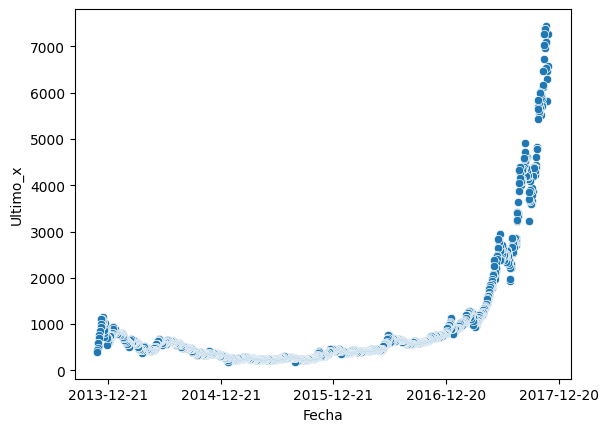

In [39]:
sns.scatterplot (data= tabla_graficos, x="Fecha", y= "Ultimo_x")
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(base=12))
ax.xaxis.set_major_locator(MultipleLocator(base=365))

En este gráfico de "precio de cierre" de Bitcoin, se puede observar que en el rango que va de 2012 a fines de 2016, el precio no experimento variaciones significativas. A partir de 2017,se observa un cambio de tendencia.

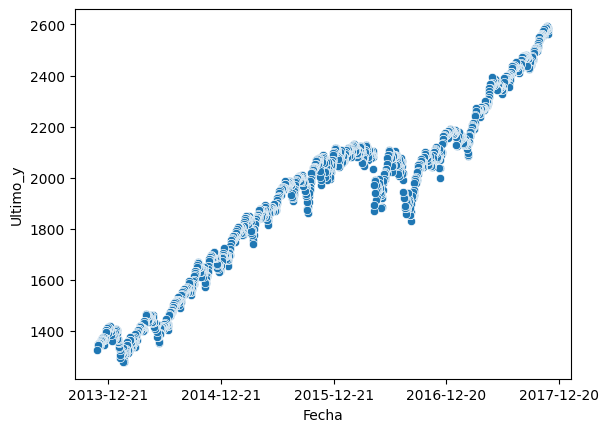

In [40]:
sns.scatterplot (data= tabla_graficos, x="Fecha", y= "Ultimo_y")
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(base=12))
ax.xaxis.set_major_locator(MultipleLocator(base=365))

En este gráfico de "precio de cierre" del índice S&P, se observa una clara tendencia alcista en el rango 2012 y principios de 2015. Luego, se observa una corrección en el período 2015, para luego retomar la tendencia alcista a partir de 2016.

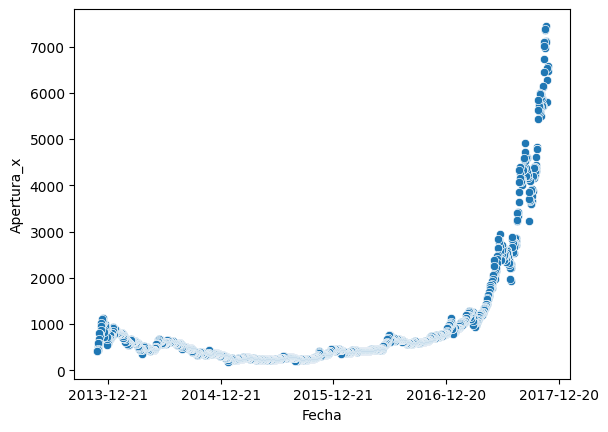

In [41]:
sns.scatterplot (data= tabla_graficos, x="Fecha", y= "Apertura_x")
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(base=12))
ax.xaxis.set_major_locator(MultipleLocator(base=365))

En este gráfico de "precio de apertura" de Bitcoin, se puede observar que en el rango que va de 2012 a fines de 2016, el precio no experimento variaciones significativas. A partir de 2017,se observa un cambio de tendencia.

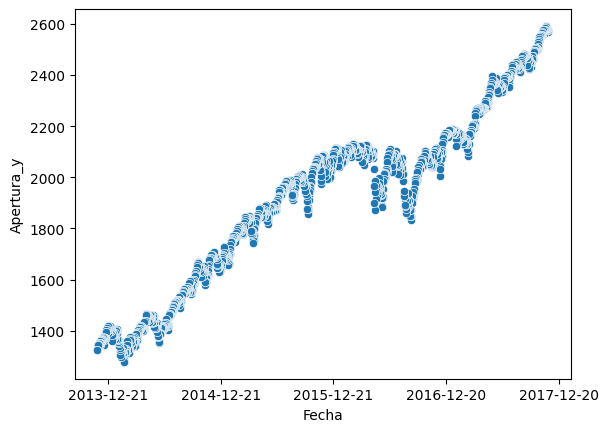

In [42]:
sns.scatterplot (data= tabla_graficos, x="Fecha", y= "Apertura_y")
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(base=12))
ax.xaxis.set_major_locator(MultipleLocator(base=365))

En este gráfico de "precio de apertura" del índice S&P, se observa una  tendencia alcista en el rango 2012-2014, con correcciones en el período 2014-2016 a la baja para luego retomar la tendencia alcista a partir de 2017.

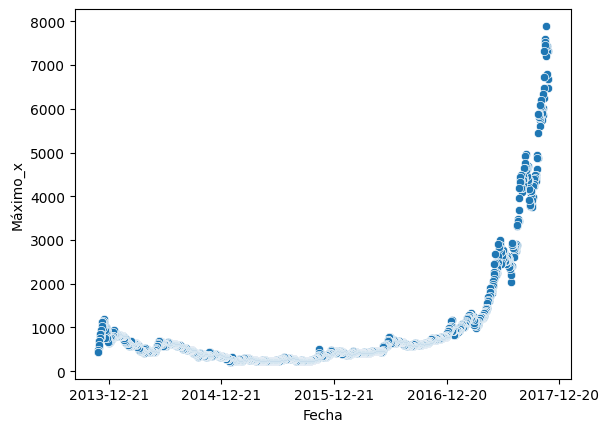

In [43]:
sns.scatterplot (data= tabla_graficos, x="Fecha", y= "Máximo_x")
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(base=12))
ax.xaxis.set_major_locator(MultipleLocator(base=365))

En este gráfico de "precios máximos" de Bitcoin, se puede observar que en el rango que va de 2012 a fines de 2016, el precio no experimento variaciones significativas. A partir de 2017,se observa un cambio de tendencia.

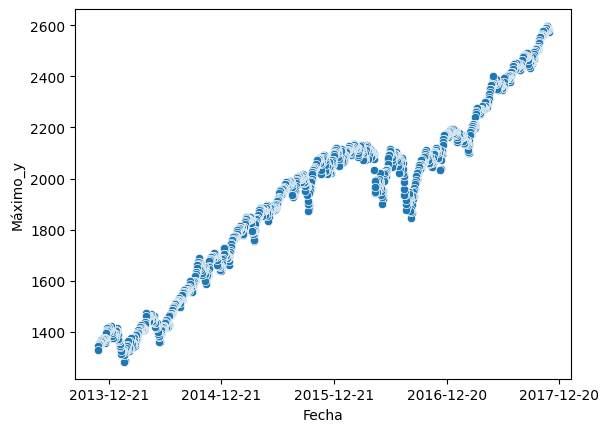

In [44]:
sns.scatterplot (data= tabla_graficos, x="Fecha", y= "Máximo_y")
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(base=12))
ax.xaxis.set_major_locator(MultipleLocator(base=365))

En este gráfico de "precio máximos" del índice S&P, se observa una tendencia alcista en el período 2012-2014. A partir de 2015, se observa cierta estabilidad en la cotización, con corrección a la baja a fines de 2015. Luego, a principios de 2016, retoma la tendencia alcista.

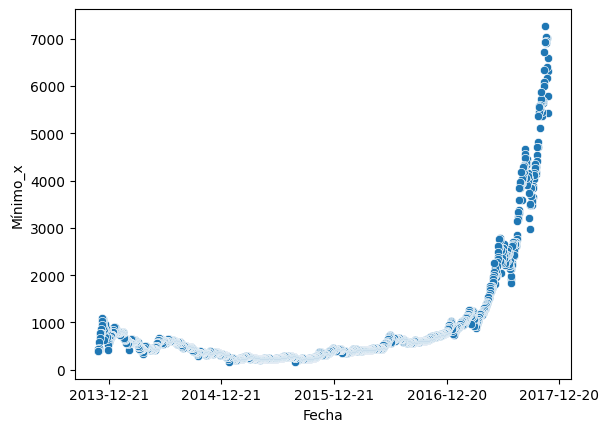

In [45]:
sns.scatterplot (data= tabla_graficos, x="Fecha", y= "Mínimo_x")
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(base=12))
ax.xaxis.set_major_locator(MultipleLocator(base=365))

En este gráfico de "precios mínimos" de Bitcoin, se puede observar que en el rango que va de 2012 a fines de 2016, el precio no experimento variaciones significativas. A partir de 2017,se observa un cambio de tendencia.

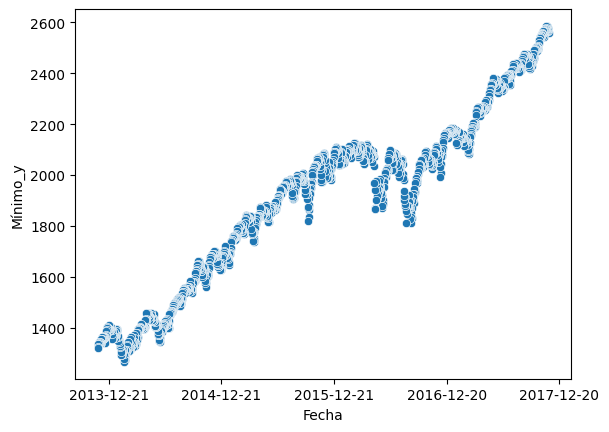

In [46]:
sns.scatterplot (data= tabla_graficos, x="Fecha", y= "Mínimo_y")
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(base=12))
ax.xaxis.set_major_locator(MultipleLocator(base=365))

En este gráfico de "precio mínimos" del índice S&P, se observa una tendencia alcista en el rango 2012-2014. A partir de 2015, se observa cierta estabilidad en la cotización, con corrección a la baja a fín de año. Luego, a principios de 2016, retoma la tendencia alcista.

Comparación Precios Máximos Bitcoin y Índice S&P

<Axes: xlabel='Máximo_x', ylabel='Máximo_y'>

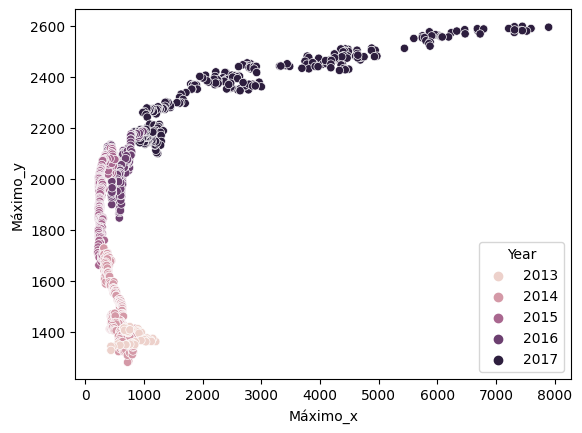

In [ ]:
sns.scatterplot (data= tabla_graficos, x="Máximo_x", y= "Máximo_y",hue= "Year")

Comparación precios mínimos Bitcoin y Índice S&P

<Axes: xlabel='Mínimo_x', ylabel='Mínimo_y'>

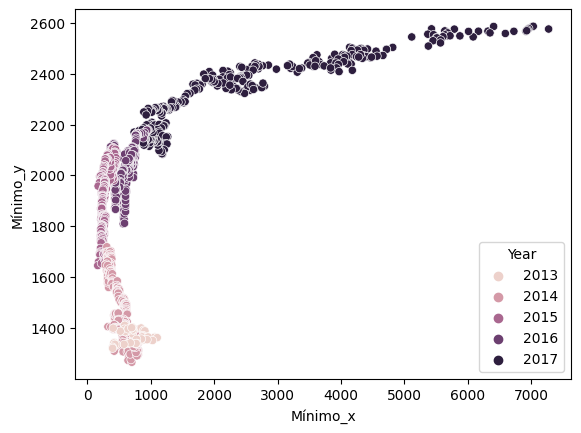

In [ ]:
sns.scatterplot (data= tabla_graficos, x="Mínimo_x", y= "Mínimo_y", hue= "Year")

Comparación Precios de cierre Bitcoin y Índice S&P

<Axes: xlabel='Ultimo_x', ylabel='Ultimo_y'>

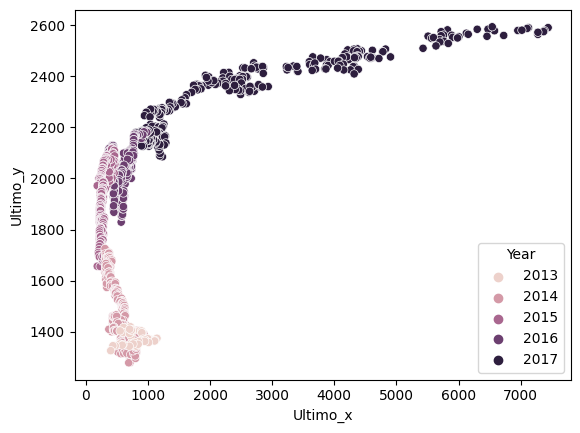

In [ ]:
sns.scatterplot (data= tabla_graficos, x="Ultimo_x", y= "Ultimo_y", hue= "Year")

Comparación precios de apertura Bitcoin y Índice S&P

<Axes: xlabel='Apertura_x', ylabel='Apertura_y'>

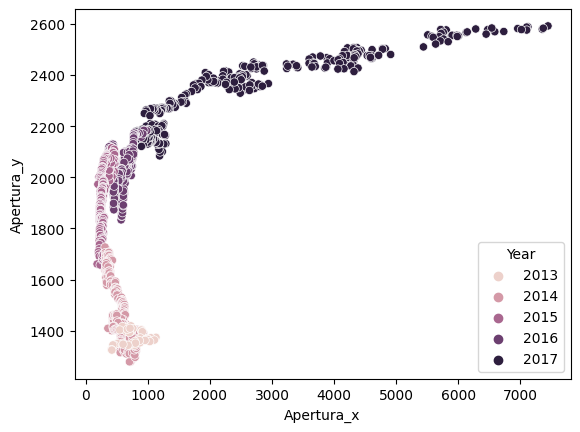

In [ ]:
sns.scatterplot (data= tabla_graficos, x="Apertura_x", y= "Apertura_y",hue= "Year")

Lo que podemos observar en los gráficos comparativos de las variables (Máx., Mín, Precio Apertura, Precio Cierre) de ambos activos es que la correlación entre los mismos es débil en valores inferiores a 2000. Como se observa en los gráficos por separado de los activos, en valores inferiores a 2000, Bitcoin no presenta variaciones significativas en sus valores, en contraste al Índice S&P que muestra variaciones sostenidas.

En base a estas observaciones, podemos inferir que en valores bajos de Bitcoin, no existe relación con los valores observados en el Índice S&P, es a partir de valores superiores a 2000 donde se observa una correlación fuerte entre ambos activos.

La siguiente tabla de correlación, muestra lo arriba descrito ya que los valores indican correlación débil entre los activos.

In [ ]:
tabla_unida.corr(method= "kendall")

,Fecha,Ultimo,Apertura,Máximo,Mínimo,Year,Train
Fecha,1.000000,0.458293,0.457738,0.458730,0.457004,1.000000,-0.012391
Ultimo,0.458293,1.000000,0.985690,0.991007,0.989730,0.458293,-0.009034
Apertura,0.457738,0.985690,1.000000,0.990122,0.988903,0.457738,-0.008928
Máximo,0.458730,0.991007,0.990122,1.000000,0.985602,0.458730,-0.009150
Mínimo,0.457004,0.989730,0.988903,0.985602,1.000000,0.457004,-0.009002
Year,1.000000,0.458293,0.457738,0.458730,0.457004,1.000000,-0.012391
Train,-0.012391,-0.009034,-0.008928,-0.009150,-0.009002,-0.012391,1.000000


La siguiente tabla evidencia la correlación fuerte entre ambos activos en valores superiores a 1500.

In [ ]:
tabla_unida.loc[tabla_unida["Máximo"]>1500].corr(method= "kendall")

,Fecha,Ultimo,Apertura,Máximo,Mínimo,Year,Train
Fecha,1.000000,0.764562,0.762260,0.772837,0.751075,1.000000,0.003050
Ultimo,0.764562,1.000000,0.953895,0.970812,0.965613,0.764562,0.011221
Apertura,0.762260,0.953895,1.000000,0.968451,0.964302,0.762260,0.013625
Máximo,0.772837,0.970812,0.968451,1.000000,0.954543,0.772837,0.010847
Mínimo,0.751075,0.965613,0.964302,0.954543,1.000000,0.751075,0.013617
Year,1.000000,0.764562,0.762260,0.772837,0.751075,1.000000,0.003050
Train,0.003050,0.011221,0.013625,0.010847,0.013617,0.003050,1.000000


**Forward Selection**



El proceso de selección de características se basa en un algoritmo de aprendizaje automático específico que intentamos encajar en un conjunto de datos determinado.

In [ ]:
tabla_unida = tabla_unida.drop("% var.", axis=1)

In [ ]:
tabla_unida = tabla_unida.drop("Volume", axis=1)

In [ ]:
tabla_unida

,Fecha,Ultimo,Apertura,Máximo,Mínimo,Year
0,2017-11-15,2564.62,2569.45,2572.84,2557.45,2017
1,2017-11-14,2578.87,2577.75,2579.66,2566.56,2017
2,2017-11-13,2584.84,2576.53,2587.66,2574.48,2017
3,2017-11-10,2582.30,2580.18,2583.81,2575.57,2017
4,2017-11-09,2584.62,2584.00,2586.50,2566.33,2017
...,...,...,...,...,...,...
2105,2012-02-06,5.40,5.40,5.40,5.40,2012
2106,2012-02-05,5.70,5.70,5.70,5.70,2012
2107,2012-02-04,5.90,5.90,5.90,5.90,2012
2108,2012-02-03,6.00,6.00,6.00,6.00,2012


**Separación de datos: Prueba y Entrenamiento**

In [ ]:
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=1, random_state=0, test_size=0.3)
for train_index, test_index in ss.split(tabla_unida):
    print(len(train_index))
    print(len(test_index))
tabla_unida['Train'] = 0
tabla_unida.loc[tabla_unida.index.isin(train_index),'Train'] = 1

2497
1071


Marco de datos que incluye la variable de destino y los datos reales junto con los nombres de las funciones.

In [ ]:
import pandas as pd
bos = pd.DataFrame(tabla_unida)
bos['Fecha'] = tabla_unida.Year
X = bos.drop("Fecha", 1)       # feature matrix
y = bos['Máximo']               # target feature
bos.head()

<ipython-input-49-669e082ff38a>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = bos.drop("Fecha", 1)       # feature matrix


,Fecha,Ultimo,Apertura,Máximo,Mínimo,Year,Train
0,2017,2564.62,2569.45,2572.84,2557.45,2017,1
1,2017,2578.87,2577.75,2579.66,2566.56,2017,0
2,2017,2584.84,2576.53,2587.66,2574.48,2017,0
3,2017,2582.30,2580.18,2583.81,2575.57,2017,1
4,2017,2584.62,2584.00,2586.50,2566.33,2017,0


In [ ]:
X

,Ultimo,Apertura,Máximo,Mínimo,Year,Train
0,2564.62,2569.45,2572.84,2557.45,2017,1
1,2578.87,2577.75,2579.66,2566.56,2017,0
2,2584.84,2576.53,2587.66,2574.48,2017,0
3,2582.30,2580.18,2583.81,2575.57,2017,1
4,2584.62,2584.00,2586.50,2566.33,2017,0
...,...,...,...,...,...,...
2105,5.40,5.40,5.40,5.40,2012,1
2106,5.70,5.70,5.70,5.70,2012,1
2107,5.90,5.90,5.90,5.90,2012,1
2108,6.00,6.00,6.00,6.00,2012,1


In [ ]:
y

0       2572.84
1       2579.66
2       2587.66
3       2583.81
4       2586.50
         ...   
2105       5.40
2106       5.70
2107       5.90
2108       6.00
2109       6.10
Name: Máximo, Length: 3568, dtype: float64






***Forward selection***

En la selección hacia adelante, comenzamos con un modelo nulo y luego comenzamos a ajustar el modelo con cada característica individual una a la vez y seleccionamos la característica con el valor p mínimo.



In [ ]:
import statsmodels.api as sm
def forward_selection(tabla_unida, target, significance_level=0.05):
    initial_features = tabla_unida.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(tabla_unida[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [ ]:
forward_selection(X,y)

<ipython-input-119-452bccc3e2c4>:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-119-452bccc3e2c4>:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-119-452bccc3e2c4>:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


['Mínimo', 'Máximo']

Esta función acepta datos, variable objetivo y nivel de significancia como argumentos y devuelve la lista final de características significativas basadas en valores p a través de la selección hacia adelante.

Nivel de significancia elegido SL = 0.05, con un 95% de confianza.
En función de los resultados arrojados, se puede decir que las variables más relevantes o importantes del conjunto de datos son: "Mínimo","Máximo".



```

```

**Backward selection **



En la eliminación hacia atrás, comenzamos con el modelo completo (incluidas todas las variables independientes) y luego eliminamos la característica insignificante con el valor p más alto (> nivel de significancia). Este proceso se repite una y otra vez hasta que tenemos el conjunto final de características importantes.



In [ ]:
def backward_elimination(tabla_unida, target,significance_level = 0.05):
    features = tabla_unida.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(tabla_unida[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break
    return features

In [ ]:
backward_elimination(X,y)

['Ultimo', 'Apertura', 'Máximo']

Nivel de significancia elegido SL = 0.05, con un 95% de confianza. En función de los resultados arrojados, se puede observar que las variables más relevantes o importantes del conjunto de datos son:"Ultimo", "Apertura", "Máximo".

**Eliminación bidireccional (stepwise)**



Es similar a la selección hacia adelante, pero la diferencia es que al agregar una nueva característica, también verifica la importancia de las características ya agregadas y si encuentra que alguna de las características ya seleccionadas es insignificante, simplemente elimina esa característica en particular mediante la eliminación hacia atrás.

Por lo tanto, es una combinación de selección hacia adelante y eliminación hacia atrás.

In [ ]:
def stepwise_selection(tabla_unida, target,SL_in=0.05,SL_out = 0.05):
    initial_features = tabla_unida.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(tabla_unida[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(tabla_unida[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break
        else:
            break
    return best_features

In [ ]:
stepwise_selection(X,y)

<ipython-input-123-70cd107147c1>:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-123-70cd107147c1>:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-123-70cd107147c1>:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


['Mínimo', 'Máximo']

Nivel de significancia elegido SL = 0.05, con un 95% de confianza. En función de los resultados arrojados, se puede observar que las variables más relevantes o importantes del conjunto de datos son:"Mínimo","Máximo" .

Metrica algoritmos de regresión

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Carga dataset
tabla_unida


,Fecha,Ultimo,Apertura,Máximo,Mínimo,Year,Train
0,2017,2564.62,2569.45,2572.84,2557.45,2017,1
1,2017,2578.87,2577.75,2579.66,2566.56,2017,0
2,2017,2584.84,2576.53,2587.66,2574.48,2017,0
3,2017,2582.30,2580.18,2583.81,2575.57,2017,1
4,2017,2584.62,2584.00,2586.50,2566.33,2017,0
...,...,...,...,...,...,...,...
2105,2012,5.40,5.40,5.40,5.40,2012,1
2106,2012,5.70,5.70,5.70,5.70,2012,1
2107,2012,5.90,5.90,5.90,5.90,2012,1
2108,2012,6.00,6.00,6.00,6.00,2012,1


In [ ]:
tabla_unida = tabla_unida.drop("% var.", axis=1)

In [ ]:
tabla_unida= tabla_unida.drop("Volume", axis= 1)

In [ ]:
tabla_unida

,Fecha,Ultimo,Apertura,Máximo,Mínimo,Year,Train
0,2017,2564.62,2569.45,2572.84,2557.45,2017,1
1,2017,2578.87,2577.75,2579.66,2566.56,2017,0
2,2017,2584.84,2576.53,2587.66,2574.48,2017,0
3,2017,2582.30,2580.18,2583.81,2575.57,2017,1
4,2017,2584.62,2584.00,2586.50,2566.33,2017,0
...,...,...,...,...,...,...,...
2105,2012,5.40,5.40,5.40,5.40,2012,1
2106,2012,5.70,5.70,5.70,5.70,2012,1
2107,2012,5.90,5.90,5.90,5.90,2012,1
2108,2012,6.00,6.00,6.00,6.00,2012,1


In [ ]:
tabla_unida=tabla_unida.replace("K","")

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.linear_model import LinearRegression
# crear el modelo
lr = LinearRegression()
# Ajustar el modelo con X e y
lr.fit(X_train,y_train)
# Predecir con X_test
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 1.2956395993428067e-12


El MAE es una métrica de evaluación utilizada en tareas de regresión y representa el promedio de las diferencias absolutas entre las predicciones y los valores reales. Cada diferencia absoluta es la distancia numérica entre la predicción y el valor real, sin tener en cuenta la dirección (positiva o negativa) de la diferencia.

El MAE arrojado por la función indica que el modelo tiene un rendimiento
eficiente, ya que las predicciones están más alejadas de los valores reales en promedio.

In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 2.417252854738677e-24


El MSE representa el promedio de las diferencias al cuadrado entre las predicciones y los valores reales. Cada diferencia al cuadrado penaliza más los errores grandes, lo que significa que el MSE da más importancia a las predicciones que están significativamente alejadas de los valores reales.

El MSE arrojado por la función indica que el modelo tiene un rendimiento más eficiente, ya que las predicciones están más alejadas de los valores reales en promedio.




In [ ]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 1.5547517019571572e-12


El RMSE es una versión modificada del error cuadrático medio (MSE). La principal diferencia entre el RMSE y el MSE es que el RMSE tiene las mismas unidades que la variable objetivo, ya que toma la raíz cuadrada del MSE. Esto es útil porque proporciona una medida del error de predicción en las mismas unidades que los valores reales, lo que facilita su interpretación y comparación con los datos originales.

El resultado arrojado por la función indica que el modelo tiene un rendimiento eficiente.

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

1.0


El R-cuadrado (R2) representa la proporción de la varianza de la variable dependiente (objetivo) que es explicada por el modelo. Es una medida de cuánto mejor es el modelo en comparación con un modelo constante que siempre predice la media de los valores reales.

El resultado arrojado por la función, al tener un valor de R2 = 1, indica que el modelo tiene un buen rendimiento.

**Selección Algoritmo Base**

In [ ]:
pip install dabl


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 564.3/564.3 kB 6.7 MB/s eta 0:00:00


In [ ]:
X.reset_index(inplace=True, drop=True)

In [ ]:
y= y.reset_index(drop=True)

In [ ]:
import dabl

model = dabl.SimpleRegressor()
model.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

Running DummyRegressor()
r2: -0.000 neg_mean_squared_error: -1184699.024
=== new best DummyRegressor() (using r2):
r2: -0.000 neg_mean_squared_error: -1184699.024

Running DecisionTreeRegressor(max_depth=1)
r2: 0.665 neg_mean_squared_error: -399430.910
=== new best DecisionTreeRegressor(max_depth=1) (using r2):
r2: 0.665 neg_mean_squared_error: -399430.910

Running DecisionTreeRegressor(max_leaf_nodes=8)
r2: 0.978 neg_mean_squared_error: -25679.110
=== new best DecisionTreeRegressor(max_leaf_nodes=8) (using r2):
r2: 0.978 neg_mean_squared_error: -25679.110

Running DecisionTreeRegressor(max_leaf_nodes=16)
r2: 0.995 neg_mean_squared_error: -6535.057
=== new best DecisionTreeRegressor(max_leaf_nodes=16) (using r2):
r2: 0.995 neg_mean_squared_error: -6535.057

Running DecisionTreeRegressor(max_leaf_nodes=32)
r2: 0.999 neg_mean_squared_error: -1712.920
=== new best DecisionTreeRegressor(max_leaf_nodes=32) (using r2):
r2: 0.999 neg_mean_squared_error: -1712.920

Running DecisionTreeRegresso

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.477e+05, tolerance: 3.285e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.054e+05, tolerance: 3.408e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.943e+05, tolerance: 3.451e

SimpleRegressor()

Entrenamiento de Algoritmo con Validación Simple

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(max_features=None)
model.fit(X_train, y_train)

RandomForestRegressor(max_features=None)

**Transformación de datos**

In [ ]:
from sklearn.preprocessing import StandardScaler

# datos de entrenamiento en las matrices X e y

# Crear instancias de StandardScaler para escalar X e y
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Aplicar la transformación a X e y
X_transformed = scaler_X.fit_transform(X)
y_transformed = scaler_y.fit_transform(y.values.reshape(-1,1)).flatten()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(max_features=None)
model.fit(X_transformed, y_transformed)

RandomForestRegressor(max_features=None)

**Entrenamiento de Algoritmo con Validación Simple datos transformados**

In [ ]:
import dabl

model = dabl.SimpleRegressor()
model.fit(X_transformed, y_transformed)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

Running DummyRegressor()
r2: -0.001 neg_mean_squared_error: -1.000
=== new best DummyRegressor() (using r2):
r2: -0.001 neg_mean_squared_error: -1.000

Running DecisionTreeRegressor(max_depth=1)
r2: 0.664 neg_mean_squared_error: -0.337
=== new best DecisionTreeRegressor(max_depth=1) (using r2):
r2: 0.664 neg_mean_squared_error: -0.337

Running DecisionTreeRegressor(max_leaf_nodes=8)
r2: 0.979 neg_mean_squared_error: -0.021
=== new best DecisionTreeRegressor(max_leaf_nodes=8) (using r2):
r2: 0.979 neg_mean_squared_error: -0.021

Running DecisionTreeRegressor(max_leaf_nodes=16)
r2: 0.995 neg_mean_squared_error: -0.005
=== new best DecisionTreeRegressor(max_leaf_nodes=16) (using r2):
r2: 0.995 neg_mean_squared_error: -0.005

Running DecisionTreeRegressor(max_leaf_nodes=32)
r2: 0.998 neg_mean_squared_error: -0.002
=== new best DecisionTreeRegressor(max_leaf_nodes=32) (using r2):
r2: 0.998 neg_mean_squared_error: -0.002

Running DecisionTreeRegressor(max_depth=5)
r2: 0.997 neg_mean_squared_

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


SimpleRegressor()

En función del análisis realizado:

*   Gráficos comparativos de las diferentes variables de ambos activos.

*   Tabla de correlación de datos.

*   Separación de datos en prueba y entrenamiento.

*   Selección de características en base a un algoritmo de aprendizaje automático específico ( Forward selection,Backward selection y Backward selection).

*   Cálculo de las diferentes métricas de algoritmos de regresion (MAE, MSE, RMSE, R2).

*   Selección Algoritmo Base (Simple Regressor).

*   Entrenamiento de Algoritmo con Validación Simple.

*   Transformación de datos.

*   Entrenamiento de Algoritmo con Validación Simple datos transformados.




Los resultados de los algoritmos de aprendizaje supervisado indican un modelo con buen rendimiento. A pesar de esto, al ser el tamaño de la muestra de datos de prueba y entrenamiento relativamente pequeña y al ser el RANDOM FOREST REGRESSOR el mejor algoritmo de ML recomendado para aplicar (que si bien es un modelo con poder alto, es de difícil aplicación por ser compleja de interpretar la lógica que utiliza) es de esperar una situación de OVERFITTING. Posibles formas de prevenirlo podrían ser obtener un número mayor de datos a evaluar, utilizar modelos mas simples (PARSIMONIA) y ajustar en lo posible los parámetros de los modelos a utilizar.